In [3]:
# Loading the packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
mnist=pd.read_csv('/Users/jayraj/Applied_AI_Course/Applied_ai_course/Datasets/digit-recognizer/mnist_train.csv')
mnist

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
# Separating the class
labels=mnist.label
labels.head()

0    1
1    0
2    1
3    4
4    0
Name: label, dtype: int64

In [8]:
# Separating the features
data=mnist.drop('label', axis=1)
data.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
# Data preprocessing: Standardizing the data
from sklearn.preprocessing import StandardScaler
standardized_data=StandardScaler().fit_transform(data)
print(standardized_data.shape)

(42000, 784)


In [10]:
# Finding the co-variance of a matrix which is A^T*A
sample_data=standardized_data

# Matrix multiplication using numpy
covar_matrix=np.matmul(sample_data.T, sample_data)

print('the shape of the co variance matrix is = ', covar_matrix.shape)

the shape of the co variance matrix is =  (784, 784)


In [11]:
# Finding top two eigen values and corresponding eigen vectors for projecting onto 2-D space

from scipy.linalg import eigh

# The parameter eigvals is defined (low to high) 
# eigh function will return the eigen values in ascending order (0,1,2,3,4......782,783)
# Here this code only generates top two (782 and 783)
values, vectors=eigh(covar_matrix,eigvals=(782,783))

print('the shape of eigen vectors = ', vectors.shape)

# Converting the eigen vectors into 2D for easyness of further comparison
vectors=vectors.T

print("the shape of the updated vector= ", vectors.shape)

# vectors[0] shows the 1st eigen vector 
# vectors[1] shows the 2nd eigen vector

the shape of eigen vectors =  (784, 2)
the shape of the updated vector=  (2, 784)


In [17]:
# Projecting the original data sample on the plane formed by
# two principal eigen vectors by vector-vector multiplication

new_coordinates =np.matmul(vectors,sample_data.T) # (2, 784) x (784, 42000)

print('resultant data points" shape is ', vectors.shape, 'X', sample_data.T.shape)
new_coordinates

resultant data points" shape is  (2, 784) X (784, 42000)


array([[-5.2264454 ,  6.03299601, -1.70581328, ...,  7.07627667,
        -4.34451279,  1.55912058],
       [-5.14047772, 19.29233234, -7.64450341, ...,  0.49539137,
         2.30724011, -4.80767022]])

In [19]:
import pandas as pd

# Appending label to the 2D projected data
new_coordinates = np.vstack((new_coordinates,labels)).T
new_coordinates

array([[-5.2264454 , -5.14047772,  1.        ],
       [ 6.03299601, 19.29233234,  0.        ],
       [-1.70581328, -7.64450341,  1.        ],
       ...,
       [ 7.07627667,  0.49539137,  7.        ],
       [-4.34451279,  2.30724011,  6.        ],
       [ 1.55912058, -4.80767022,  9.        ]])

In [20]:
# Creating a new dataframe for the labelled points
dataframe=pd.DataFrame(data=new_coordinates,columns=('1st_principal', '2nd_principal','labels'))
print(dataframe.head())

   1st_principal  2nd_principal  labels
0      -5.226445      -5.140478     1.0
1       6.032996      19.292332     0.0
2      -1.705813      -7.644503     1.0
3       5.836139      -0.474207     4.0
4       6.024818      26.559574     0.0


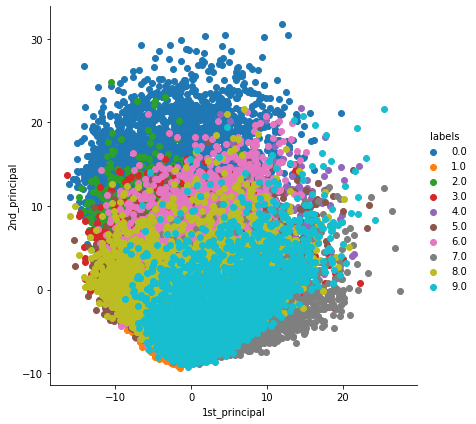

In [21]:
# Plotting the 2D data points with seaborn
import seaborn as sns
sns.FacetGrid(dataframe, hue='labels', height=6).map(plt.scatter, '1st_principal', '2nd_principal').add_legend()
plt.show()